<a href="https://colab.research.google.com/github/PolinaBaranova/MNIST/blob/main/1_1_Dataset_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка данных

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from google.colab import files

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_org.shape

(60000, 28, 28)

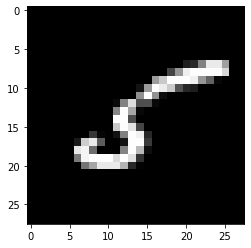


Правильный ответ:  5


In [4]:
n = 11
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
plt.show()
print()
print('Правильный ответ: ', y_train_org[n])

In [5]:
#Меняем формат входных картинок
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print('Формат НАЧАЛЬНЫХ входных тренировочных данных: ', x_train_org.shape)
print('Формат ИЗМЕНЕННЫХ входных тренировочных данных:', x_train.shape)
print()
print('Формат НАЧАЛЬНЫХ входных тестовых данных: ', x_test_org.shape)
print('Формат ИЗМЕНЕННЫХ входных тестовых данных:', x_test.shape)


Формат НАЧАЛЬНЫХ входных тренировочных данных:  (60000, 28, 28)
Формат ИЗМЕНЕННЫХ входных тренировочных данных: (60000, 784)

Формат НАЧАЛЬНЫХ входных тестовых данных:  (10000, 28, 28)
Формат ИЗМЕНЕННЫХ входных тестовых данных: (10000, 784)


In [6]:
#Нормализуем входные картинки
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [7]:
#Меняем формат исходных данных
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [8]:
print(y_train_org.shape)
print(y_train.shape)

(60000,)
(60000, 10)


In [9]:
print(y_train[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Создание нейронной сети

In [10]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

In [12]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 4s 3ms/step - loss: 0.3736 - accuracy: 0.8909
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9775
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9898
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0263 - accuracy: 0.9917
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0204 - accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9949
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9954
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9960

## Распознавание рукописных цифр

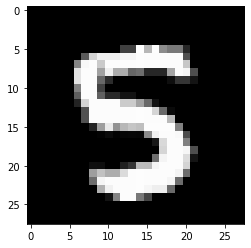

In [13]:
n_rec = 120 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [15]:
x = x_test[n_rec]
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

prediction = model.predict(x)
print(prediction)

print(sum(prediction[0]))
print()

pred = np.argmax(prediction)
print(pred)
print('Правильный ответ:', y_test_org[n_rec])

(784,)
(1, 784)
[[3.4376192e-23 2.7393583e-17 3.0350773e-23 1.8669134e-08 1.8538986e-22
  1.0000000e+00 1.8253892e-19 6.3134043e-21 5.2929514e-19 5.8476982e-12]]
1.0000000186749816

5
Правильный ответ: 5
